Data: Iris

#### Đọc và xử lý data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataframe = pd.read_csv("data/iris.csv")
dataframe[:10]

,PetalLengthCm,PetalWidthCm,Species
0,4.7,1.4,1
1,4.5,1.5,1
2,4.9,1.5,1
3,4.0,1.3,1
4,4.6,1.5,1
5,4.5,1.3,1
6,4.7,1.6,1
7,3.3,1.0,1
8,4.6,1.3,1
9,3.9,1.4,1


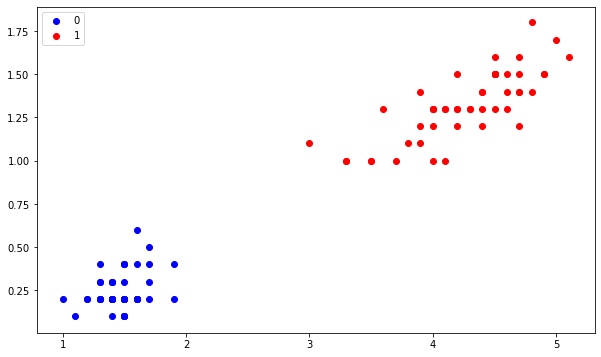

In [14]:
iris = dataframe.values
X = iris[:,:2]
y = iris[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

m,n = X.shape

In [15]:
def sigmoid_func(z):
    return 1. / (1. + np.exp(-z))

def loss_func(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):
    h = sigmoid_func(np.dot(X,theta))
    return h.round()

In [16]:
lr = 0.01
epoches = 2000

In [17]:
theta = np.random.randn(n).reshape(-1,1)

losses = []
accs = []

In [18]:
y = y.reshape(-1,1)

for i in range(epoches):
    z = np.dot(X, theta)
    h = sigmoid_func(z)
    loss = loss_func(h,y)
    
    gradient = np.dot(X.T, h-y)/m
    theta -= lr*gradient
    
    if (i%5 == 0):
        #loss
        #print(f'loss: {loss} \t')
        losses.append(loss)
        
        #accuracy
        preds = predict(X, theta)
        acc = (preds == y).mean()
        #print(f'acc: {acc} \t')
        accs.append(acc)

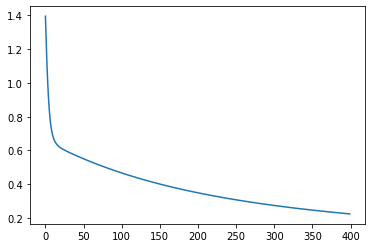

In [19]:
#giá trị của loss
plt.plot(losses[:])

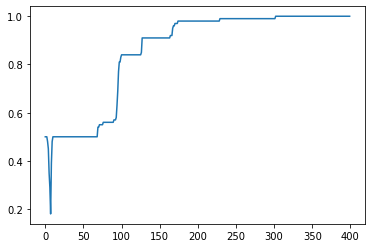

In [20]:
#độ chính xác của mô hình qua từng lần lặp
plt.plot(accs[:])